In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
df = pd.read_csv('car.csv')

In [40]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [42]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [43]:
df.duplicated().sum()

np.int64(2)

In [44]:
df.drop_duplicates(inplace=True)

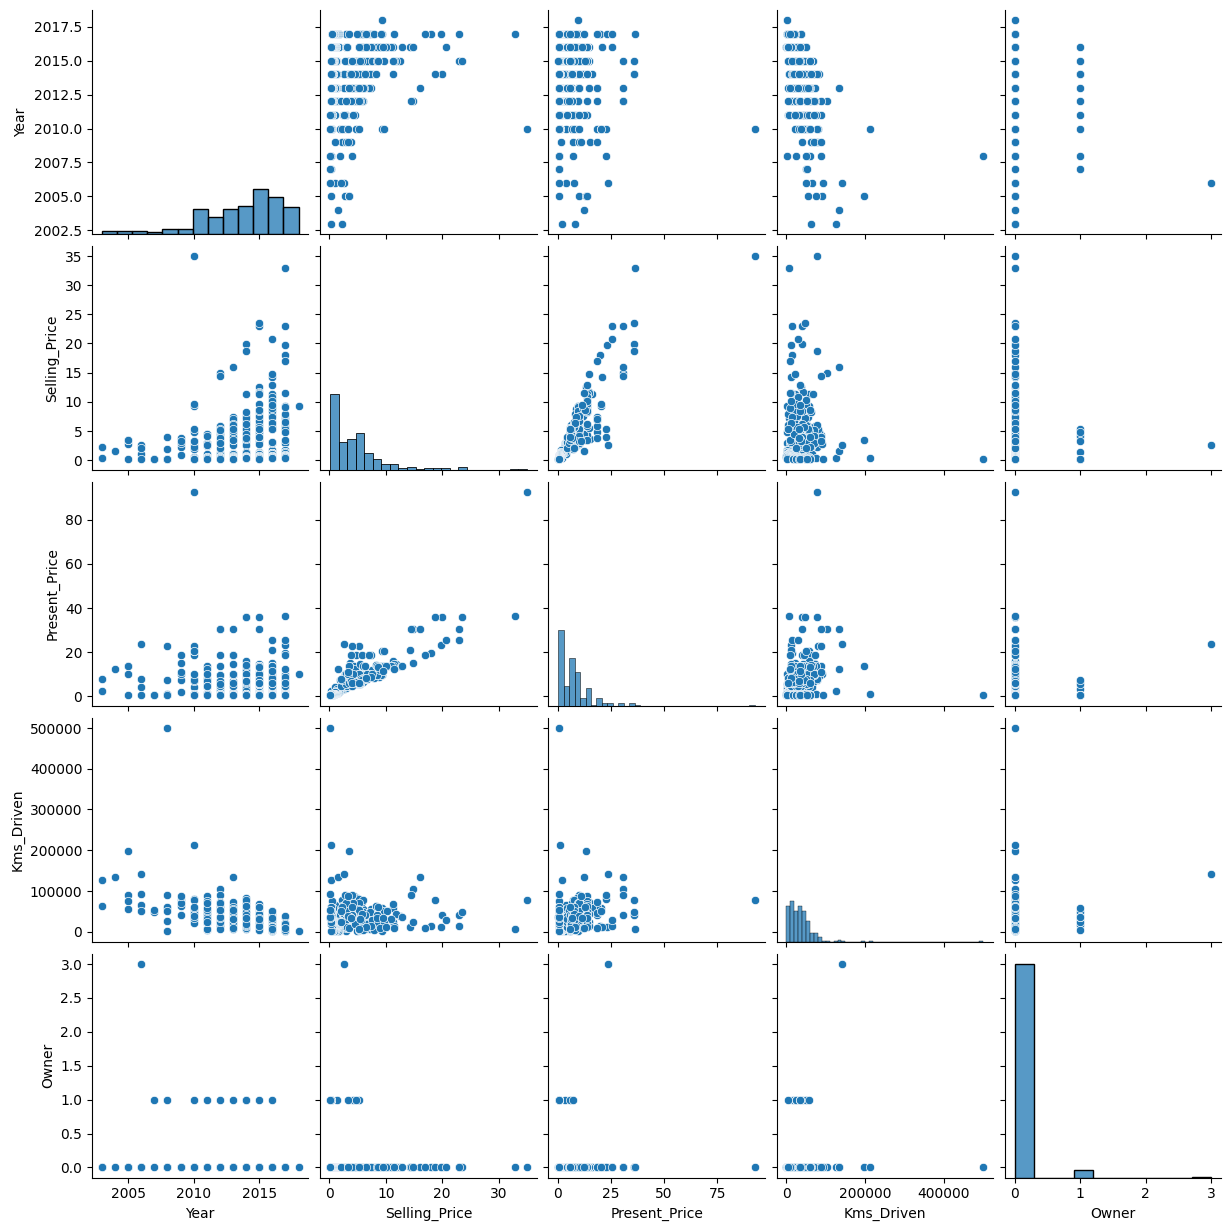

In [45]:
sns.pairplot(df)

In [46]:
df['car_age'] = 2025 - df['Year']

In [47]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,car_age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,11
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,12
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,8
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,14
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,11


In [48]:
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()
# Apply normalization
df[['Kms_Driven_Norm', 'Present_Price_Norm']] = minmax_scaler.fit_transform(df[['Kms_Driven', 'Present_Price']])

In [49]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
# Apply standardization
df[['Kms_Driven_Std', 'Present_Price_Std']] = standard_scaler.fit_transform(df[['Kms_Driven', 'Present_Price']])


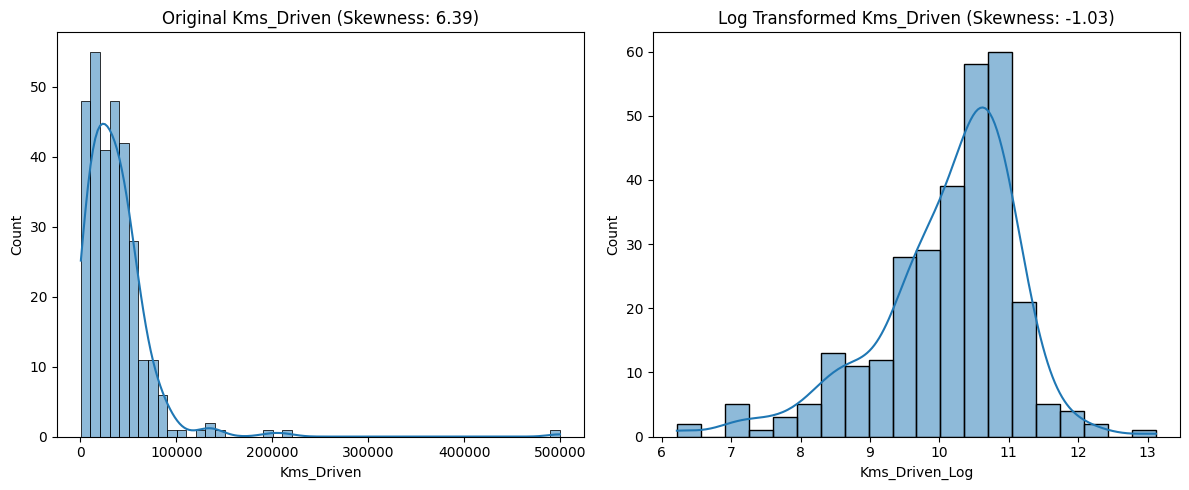

In [50]:
from scipy.stats import skew
# Check skewness
kms_skewness = skew(df['Kms_Driven'])
original_kms = df['Kms_Driven']

# Log transform to reduce skewness
df['Kms_Driven_Log'] = np.log1p(df['Kms_Driven'])
log_kms_skewness = skew(df['Kms_Driven_Log'])

# Plot original vs log-transformed
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(original_kms, kde=True, ax=axes[0])
axes[0].set_title(f"Original Kms_Driven (Skewness: {kms_skewness:.2f})")
sns.histplot(df['Kms_Driven_Log'], kde=True, ax=axes[1])
axes[1].set_title(f"Log Transformed Kms_Driven (Skewness: {log_kms_skewness:.2f})")
plt.tight_layout()
plt.show()


In [51]:
from datetime import datetime

# Step 1: Create Car_Age from Year
current_year = datetime.now().year
df['Car_Age'] = current_year - df['Year']

# Step 2: Create interaction term between age and kms driven
df['Age_Kms_Interaction'] = df['Car_Age'] * df['Kms_Driven']

# Optional: Drop 'Year' if not needed
# df.drop('Year', axis=1, inplace=True)

In [52]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,car_age,Kms_Driven_Norm,Present_Price_Norm,Kms_Driven_Std,Present_Price_Std,Kms_Driven_Log,Car_Age,Age_Kms_Interaction
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,11,0.053053,0.057109,-0.254603,-0.228097,10.203629,11,297000
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,12,0.085085,0.099913,0.156181,0.233700,10.668979,12,516000
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,8,0.012813,0.103273,-0.770651,0.269942,8.839422,8,55200
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,14,0.009409,0.041504,-0.814297,-0.396448,8.556606,14,72800
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,11,0.083984,0.070980,0.142061,-0.078451,10.656106,11,466950


In [53]:
df['Car_Name'].nunique()

98

In [54]:
# # Frequency encoding for Car_Name
# df['Car_Name_Encoded'] = df['Car_Name'].map(df['Car_Name'].value_counts())

# # Optional: drop the original column if you don't need it
# # df.drop('Car_Name', axis=1, inplace=True)

# # One-Hot Encoding (only if cardinality is low)
# df = pd.get_dummies(df, columns=['Car_Name'], drop_first=True)

In [55]:
from sklearn.preprocessing import LabelEncoder

# List of categorical features to encode
categorical_cols = ['Fuel_Type', 'Seller_Type', 'Transmission']

# Apply Label Encoding
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col + '_Encoded'] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save the encoder for potential inverse_transform later

# Display the updated DataFrame with encoded columns
df_encoded = df[[col for col in df.columns if 'Encoded' in col]]
df.head(3)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,car_age,Kms_Driven_Norm,Present_Price_Norm,Kms_Driven_Std,Present_Price_Std,Kms_Driven_Log,Car_Age,Age_Kms_Interaction,Fuel_Type_Encoded,Seller_Type_Encoded,Transmission_Encoded
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,11,0.053053,0.057109,-0.254603,-0.228097,10.203629,11,297000,2,0,1
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,12,0.085085,0.099913,0.156181,0.233700,10.668979,12,516000,1,0,1
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,8,0.012813,0.103273,-0.770651,0.269942,8.839422,8,55200,2,0,1


In [57]:
from datetime import datetime

# Create interaction features
df['Age_Kms_Driven'] = df['Car_Age'] * df['Kms_Driven']
df['Age_Present_Price'] = df['Car_Age'] * df['Present_Price']
df['Present_Price_Kms_Driven'] = df['Present_Price'] * df['Kms_Driven']

In [58]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,car_age,...,Present_Price_Std,Kms_Driven_Log,Car_Age,Age_Kms_Interaction,Fuel_Type_Encoded,Seller_Type_Encoded,Transmission_Encoded,Age_Kms_Driven,Age_Present_Price,Present_Price_Kms_Driven
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,11,...,-0.228097,10.203629,11,297000,2,0,1,297000,61.49,150930.0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,12,...,0.233700,10.668979,12,516000,1,0,1,516000,114.48,410220.0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,8,...,0.269942,8.839422,8,55200,2,0,1,55200,78.80,67965.0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,14,...,-0.396448,8.556606,14,72800,2,0,1,72800,58.10,21580.0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,11,...,-0.078451,10.656106,11,466950,1,0,1,466950,75.57,291631.5


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 300
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Car_Name                  299 non-null    object 
 1   Year                      299 non-null    int64  
 2   Selling_Price             299 non-null    float64
 3   Present_Price             299 non-null    float64
 4   Kms_Driven                299 non-null    int64  
 5   Fuel_Type                 299 non-null    object 
 6   Seller_Type               299 non-null    object 
 7   Transmission              299 non-null    object 
 8   Owner                     299 non-null    int64  
 9   car_age                   299 non-null    int64  
 10  Kms_Driven_Norm           299 non-null    float64
 11  Present_Price_Norm        299 non-null    float64
 12  Kms_Driven_Std            299 non-null    float64
 13  Present_Price_Std         299 non-null    float64
 14  Kms_Driven_Log 

In [61]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner', 'car_age',
       'Kms_Driven_Norm', 'Present_Price_Norm', 'Kms_Driven_Std',
       'Present_Price_Std', 'Kms_Driven_Log', 'Car_Age', 'Age_Kms_Interaction',
       'Fuel_Type_Encoded', 'Seller_Type_Encoded', 'Transmission_Encoded',
       'Age_Kms_Driven', 'Age_Present_Price', 'Present_Price_Kms_Driven'],
      dtype='object')

In [63]:
cars = df[["Selling_Price", 'Owner', 'car_age',
       'Kms_Driven_Norm', 'Present_Price_Norm', 'Kms_Driven_Std',
       'Present_Price_Std', 'Kms_Driven_Log', 'Car_Age', 'Age_Kms_Interaction',
       'Fuel_Type_Encoded', 'Seller_Type_Encoded', 'Transmission_Encoded',
       'Age_Kms_Driven', 'Age_Present_Price', 'Present_Price_Kms_Driven']]

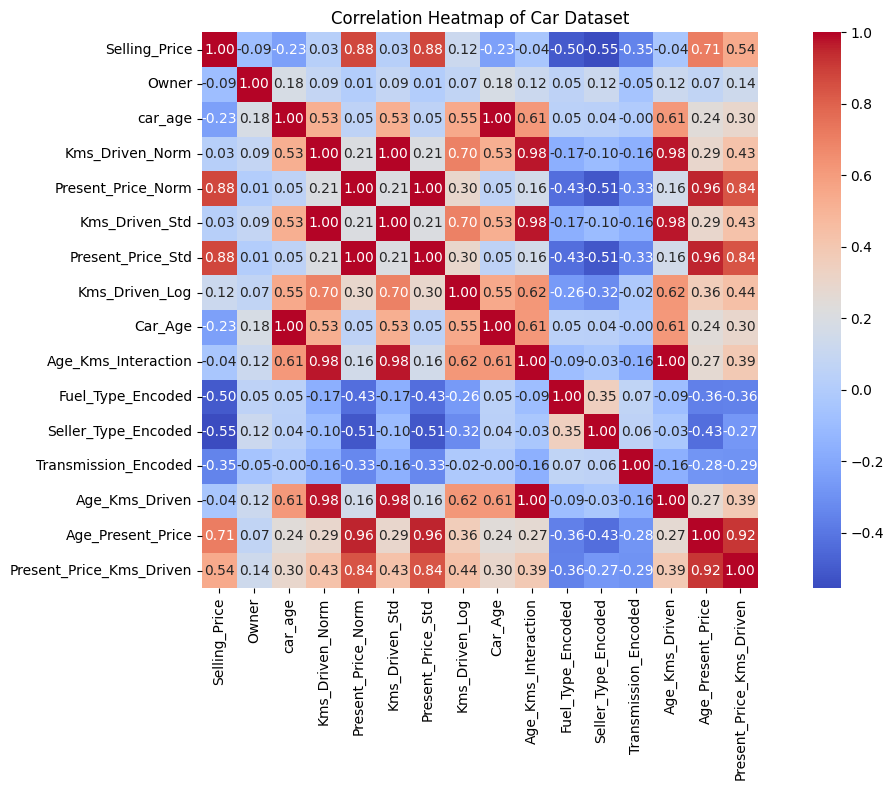

summary: 
       Selling_Price       Owner     car_age  Kms_Driven_Norm  \
count     299.000000  299.000000  299.000000       299.000000   
mean        4.589632    0.043478   11.384615         0.072906   
std         4.984240    0.248720    2.896868         0.078108   
min         0.100000    0.000000    7.000000         0.000000   
25%         0.850000    0.000000    9.000000         0.029029   
50%         3.510000    0.000000   11.000000         0.063063   
75%         6.000000    0.000000   13.000000         0.096864   
max        35.000000    3.000000   22.000000         1.000000   

       Present_Price_Norm  Kms_Driven_Std  Present_Price_Std  Kms_Driven_Log  \
count          299.000000    2.990000e+02       2.990000e+02      299.000000   
mean             0.078251   -4.158695e-17       4.752794e-17       10.115333   
std              0.092847    1.001676e+00       1.001676e+00        1.015905   
min              0.000000   -9.349646e-01      -8.442155e-01        6.216606   
25% 

In [64]:
summary = cars.describe()
correlation_matrix = cars.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Heatmap of Car Dataset")
plt.tight_layout()
plt.show()
Selling_Price_correlations = correlation_matrix["Selling_Price"].sort_values(ascending=False)
print(f"summary: \n{summary}\n\nSelling_Price_corr: \n{Selling_Price_correlations}")

In [67]:
features = df[['Selling_Price','Present_Price_Norm','Age_Present_Price','Present_Price_Kms_Driven','car_age','Transmission_Encoded','Fuel_Type_Encoded','Seller_Type_Encoded']]

In [68]:
# Import train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split

# Define the target variable (y) and features (X)
# 'Selling_Price' is typically the target variable in this type of dataset
y = features['Selling_Price']

# Select the features (all columns except 'Selling_Price')
# You can drop 'Selling_Price' from the 'cars' DataFrame to get the features
X = features.drop('Selling_Price', axis=1)

# Perform the train-test split
# test_size=0.20 means 20% of the data will be used for testing, 80% for training
# random_state is set for reproducibility, so you get the same split every time
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Print the shapes of the resulting datasets to verify the split
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (239, 7)
Shape of X_test: (60, 7)
Shape of y_train: (239,)
Shape of y_test: (60,)


In [69]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression, PoissonRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [71]:
rmse = []
r2 = []
reg = [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor(), PoissonRegressor(), Lasso(), Ridge(), ElasticNet()]
for model in reg:
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    rmse.append(np.sqrt(mean_squared_error(y_test, preds)))
    r2.append(r2_score(y_test, preds))
performance_df = pd.DataFrame({"models": ["LinearRegression", "DecisionTreeRegressor", "RandomForestRegressor",  "PoissonRegressor", "Lasso", "Ridge", "ElasticNet"], "rmse": rmse, "r2": r2}).sort_values("r2", ascending = False)
performance_df

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: invalid value encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights


,models,rmse,r2
0,LinearRegression,1.189316,0.945119
5,Ridge,2.715811,0.713826
1,DecisionTreeRegressor,2.936351,0.665461
2,RandomForestRegressor,3.204010,0.601693
6,ElasticNet,3.259750,0.587713
4,Lasso,3.287349,0.580702
3,PoissonRegressor,5.076824,-0.000034


In [ ]:
# Since LinearRegression has no tuneable parameters, we Consider it best model.

In [77]:
model = LinearRegression()
model.fit(X_train, y_train)
preds = model.predict(X_test)
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, preds))}, R2: {r2_score(y_test, preds)}")
tst = pd.DataFrame({"Predicted values": preds.flatten(), "Actual values": y_test})
tst.head()

RMSE: 1.1893159723232314, R2: 0.945118608974398


,Predicted values,Actual values
283,8.906739,8.99
267,7.700120,8.35
166,0.483826,0.45
9,6.701974,7.45
78,8.543780,5.25


In [78]:
# Evaluate the model on the training set
y_train_pred = model.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)

# Evaluate the model on the test set (you already have this from your previous code)
y_test_pred = model.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)

print("Training Set Performance:")
print(f"RMSE: {rmse_train:.4f}")
print(f"R2: {r2_train:.4f}")
print("\nTesting Set Performance:")
print(f"RMSE: {rmse_test:.4f}")
print(f"R2: {r2_test:.4f}")

# Interpretation
if r2_train > r2_test and abs(r2_train - r2_test) > 0.1: # Adjust the threshold (0.1) as needed
    print("\nPotential Overfitting: Training performance is significantly better than testing performance.")
elif r2_train < r2_test and abs(r2_train - r2_test) > 0.1: # This case is less common but possible
     print("\nPotential Underfitting or Data Discrepancy: Testing performance is significantly better than training performance.")
elif r2_train < 0.5: # Adjust the R2 threshold (0.5) based on your problem
    print("\nPotential Underfitting: Both training and testing performance are poor.")
else:
    print("\nThe model appears to have a reasonable balance between training and testing performance.")


Training Set Performance:
RMSE: 0.8368
R2: 0.9714

Testing Set Performance:
RMSE: 1.1893
R2: 0.9451

The model appears to have a reasonable balance between training and testing performance.
